# Libraries

In [ ]:
!pip install statannot
!pip install scikit-posthocs
!pip install statannotations
!wget -O TimesNewRoman.ttf https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf

--2025-08-27 16:26:17--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-08-27 16:26:18--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘TimesNewRoman.ttf’

TimesNewRoman.ttf   100%[===================>] 814.89K  --.-KB/s    in 0.03s   

2025-08-27 16:26:18 (23.2 MB/s) - ‘TimesNewRoman.ttf’ saved [834452/834452]



In [ ]:
import pandas as pd
import numpy as np
from numpy import count_nonzero
import math

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import seaborn as sns

fm.fontManager.addfont("TimesNewRoman.ttf")
plt.rcParams["font.family"] = "Times New Roman"
mpl.rcParams['axes.grid'] = False

from scipy import stats
from scipy.stats import kruskal, mannwhitneyu
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statannot import add_stat_annotation
from scikit_posthocs import posthoc_tukey
from scikit_posthocs import posthoc_dunn
from statannotations.Annotator import Annotator
from scipy.stats import tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TRIAL 1

## Kruskal-Wallis Test

In [ ]:
DATA1_1 = pd.read_excel('/content/drive/MyDrive/BETA/PROYECTO PRODIPLOSIS/2. ARTICULO_TRAMPAS/Trials.xlsx', sheet_name='Trial_1')
id_vars = ['invernadero', 'cama', 'fecha', 'N_Eval_dia']
value_vars = ['trampa_Yellow',
       'trampa_White', 'trampa_Black']
df_melted = pd.melt(DATA1_1,
                    id_vars=id_vars,
                    value_vars=value_vars,
                    var_name='COLOR',
                    value_name='ADULTOS')
df_melted['COLOR'] = df_melted['COLOR'].str.replace('trampa_', '')

fechas_grupos = [df_melted['ADULTOS'][df_melted['fecha'] == f].values for f in df_melted['fecha'].unique()]
kruskal_fecha = kruskal(*fechas_grupos)
print("Resultados de Kruskal-Wallis para las fechas:")
print(f"Estadístico: {kruskal_fecha.statistic:.4f}")
print(f"Valor p: {kruskal_fecha.pvalue:.4f}\n")
colores_grupos = [df_melted['ADULTOS'][df_melted['COLOR'] == c].values for c in df_melted['COLOR'].unique()]
kruskal_color = kruskal(*colores_grupos)
print("Resultados de Kruskal-Wallis para los colores:")
print(f"Estadístico: {kruskal_color.statistic:.4f}")
print(f"Valor p: {kruskal_color.pvalue:.4f}")

Resultados de Kruskal-Wallis para las fechas:
Estadístico: 16.5568
Valor p: 0.0024

Resultados de Kruskal-Wallis para los colores:
Estadístico: 1.4271
Valor p: 0.4899


## Mann-Whitney Test

### Fig. 1A

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2021-06-26 vs. 2021-06-27: Mann-Whitney-Wilcoxon test two-sided, P_val:2.881e-02 U_stat=1.620e+03
2021-06-27 vs. 2021-06-28: Mann-Whitney-Wilcoxon test two-sided, P_val:6.769e-03 U_stat=2.010e+03
2021-06-25 vs. 2021-06-27: Mann-Whitney-Wilcoxon test two-sided, P_val:2.881e-02 U_stat=1.620e+03
2021-06-27 vs. 2021-06-29: Mann-Whitney-Wilcoxon test two-sided, P_val:2.881e-02 U_stat=1.980e+03


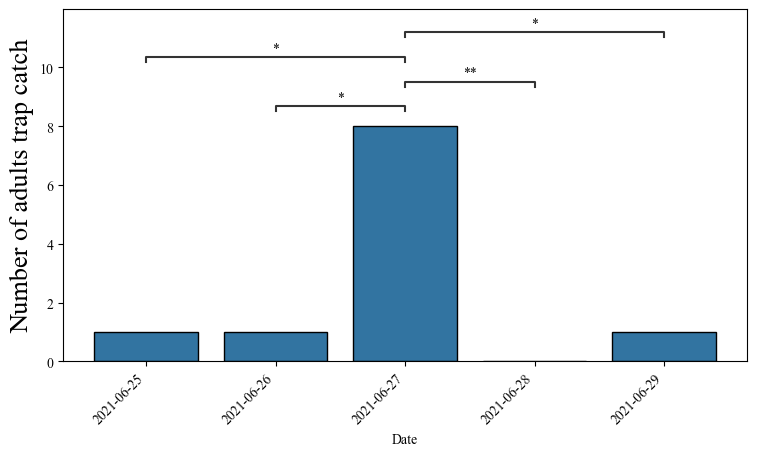

In [ ]:
data = df_melted.copy()
data['fecha'] = data['fecha'].astype(str)

data_sum = data.groupby('fecha', as_index=False)['ADULTOS'].sum()

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=data_sum,
    x='fecha',
    y='ADULTOS',
    ci=None,
    edgecolor='black',
    linewidth=1
)


ax.set_xlabel('Date')
ax.set_ylabel('Number of adults trap catch', size=19)

fechas_unicas = data['fecha'].unique()
pairs = [(fechas_unicas[i], fechas_unicas[j]) for i in range(len(fechas_unicas)) for j in range(i + 1, len(fechas_unicas))]

annotator = Annotator(ax, pairs, data=data, x='fecha', y='ADULTOS')
annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    hide_non_significant=True
)
annotator.apply_test()
ax, test_results = annotator.annotate()

for line in ax.lines:
    if line.get_linewidth() > 0:
        line.set_visible(True)
plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 18,
    'ytick.labelsize': 21,
    'legend.fontsize': 21
})
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Fig. 1B

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yellow vs. White: Mann-Whitney-Wilcoxon test two-sided, P_val:4.850e-01 U_stat=5.098e+03
White vs. Black: Mann-Whitney-Wilcoxon test two-sided, P_val:6.482e-01 U_stat=5.051e+03
Yellow vs. Black: Mann-Whitney-Wilcoxon test two-sided, P_val:2.512e-01 U_stat=5.150e+03


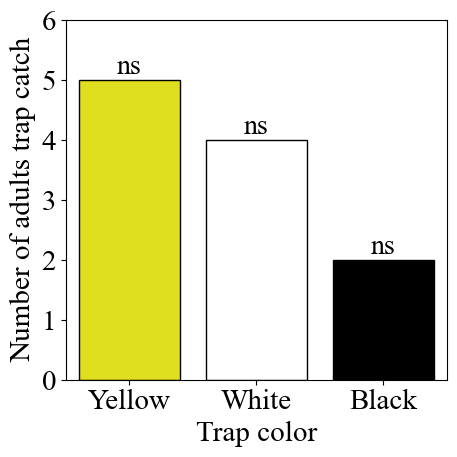

In [ ]:
from itertools import combinations

data = df_melted.copy()
data['COLOR'] = data['COLOR'].astype(str)

colores_unicos = data['COLOR'].unique()
pairs = list(combinations(colores_unicos, 2))

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

annotator = Annotator(ax, pairs, data=data, x='COLOR', y='ADULTOS')
annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    hide_non_significant=False
)
annotator.apply_test()
_, test_results = annotator.annotate()

plt.close(fig)

plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21
})

data = df_melted.copy()
data['COLOR'] = data['COLOR'].astype(str)
data_sum = data.groupby('COLOR')['ADULTOS'].sum().reset_index()
palette_colores = {'Yellow': 'yellow', 'White': 'white', 'Black': 'black'}
order = ['Yellow', 'White', 'Black']

plt.figure(figsize=(5, 5))
ax = sns.barplot(
    data=data_sum,
    x='COLOR',
    y='ADULTOS',
    hue='COLOR',
    palette=palette_colores,
    ci=None,
    edgecolor='black',
    linewidth=1,
    legend=False,
    order=order
)

ax.set_xlabel('Trap color')
ax.set_ylabel('Number of adults trap catch')
ax.set_ylim(0, 6)

group_letters = {
    'Yellow': 'ns',
    'White': 'ns',
    'Black': 'ns'
}

for i, patch in enumerate(ax.patches):
    category = order[i]
    letter = group_letters.get(category, '')
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height + max(data_sum['ADULTOS']) * 0.00,
        letter,
        ha='center',
        va='bottom',
        fontsize=20,
        fontweight='bold',
        color='black'
    )

plt.tight_layout()
plt.show()

# TRIAL 2

## Kruskal-Wallis Test

In [ ]:
DATA1_2 = pd.read_excel('/content/drive/MyDrive/BETA/PROYECTO PRODIPLOSIS/2. ARTICULO_TRAMPAS/Trials.xlsx', sheet_name='Trial_2')
DATA1_2.columns = ['Fecha', 'COLOR', 'Invernadero', 'Cama', 'Altura', 'ADULTOS']
df_final = DATA1_2.copy()
dict_colores = {'Blanca': 'White', 'Amarilla': 'Yellow'}
df_final['COLOR'] = df_final['COLOR'].replace(dict_colores)

fechas_grupos = [df_final['ADULTOS'][df_final['Fecha'] == f].values for f in df_final['Fecha'].unique()]

kruskal_fecha = kruskal(*fechas_grupos)
print("Resultados de Kruskal-Wallis para las fechas:")
print(f"Estadístico: {kruskal_fecha.statistic:.4f}")
print(f"Valor p: {kruskal_fecha.pvalue:.1E}\n")

colores_grupos = [df_final['ADULTOS'][df_final['COLOR'] == c].values for c in df_final['COLOR'].unique()]

kruskal_color = kruskal(*colores_grupos)
print("Resultados de Kruskal-Wallis para COLOR:")
print(f"Estadístico: {kruskal_color.statistic:.4f}")
print(f"Valor p: {kruskal_color.pvalue}\n")

df_final['COLOR_FECHA'] = df_final['COLOR'].astype(str) + '_' + df_final['Fecha'].astype(str)

color_fecha_grupos = [df_final['ADULTOS'][df_final['COLOR_FECHA'] == cf].values for cf in df_final['COLOR_FECHA'].unique()]

kruskal_color_fecha = kruskal(*color_fecha_grupos)
print("Resultados de Kruskal-Wallis para la combinación COLOR_FECHA:")
print(f"Estadístico: {kruskal_color_fecha.statistic:.4f}")
print(f"Valor p: {kruskal_color_fecha.pvalue:.1E}")

Resultados de Kruskal-Wallis para las fechas:
Estadístico: 60.1298
Valor p: 2.1E-08

Resultados de Kruskal-Wallis para COLOR:
Estadístico: 0.0348
Valor p: 0.8519716622085158

Resultados de Kruskal-Wallis para la combinación COLOR_FECHA:
Estadístico: 64.3390
Valor p: 8.8E-06


## Mann-Whitney Test

### Fig. 1C

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Yellow_2021-09-04 vs. White_2021-09-06: Mann-Whitney-Wilcoxon test two-sided, P_val:6.452e-04 U_stat=2.000e+01
Yellow_2021-09-06 vs. White_2021-09-07: Mann-Whitney-Wilcoxon test two-sided, P_val:8.741e-04 U_stat=0.000e+00
White_2021-09-04 vs. White_2021-09-06: Mann-Whitney-Wilcoxon test two-sided, P_val:2.190e-03 U_stat=2.100e+01
Yellow_2021-09-04 vs. Yellow_2021-09-06: Mann-Whitney-Wilcoxon test two-sided, P_val:3.098e-04 U_stat=2.600e+01
White_2021-09-06 vs. White_2021-09-07: Mann-Whitney-Wilcoxon test two-sided, P_val:2.596e-02 U_stat=0.000e+00
White_2021-09-07 vs. White_2021-09-08: Mann-Whitney-Wilcoxon test two-sided, P_val:2.334e-02 U_stat=7.000e+00
White_2021-09-04 vs. Yellow_2021-09-06: Mann-Whitney-Wilcoxon test two-sided, P_val:1.115e-03 U_stat=2.600e+01
Yellow_2021-09-04 vs. Yellow_2021

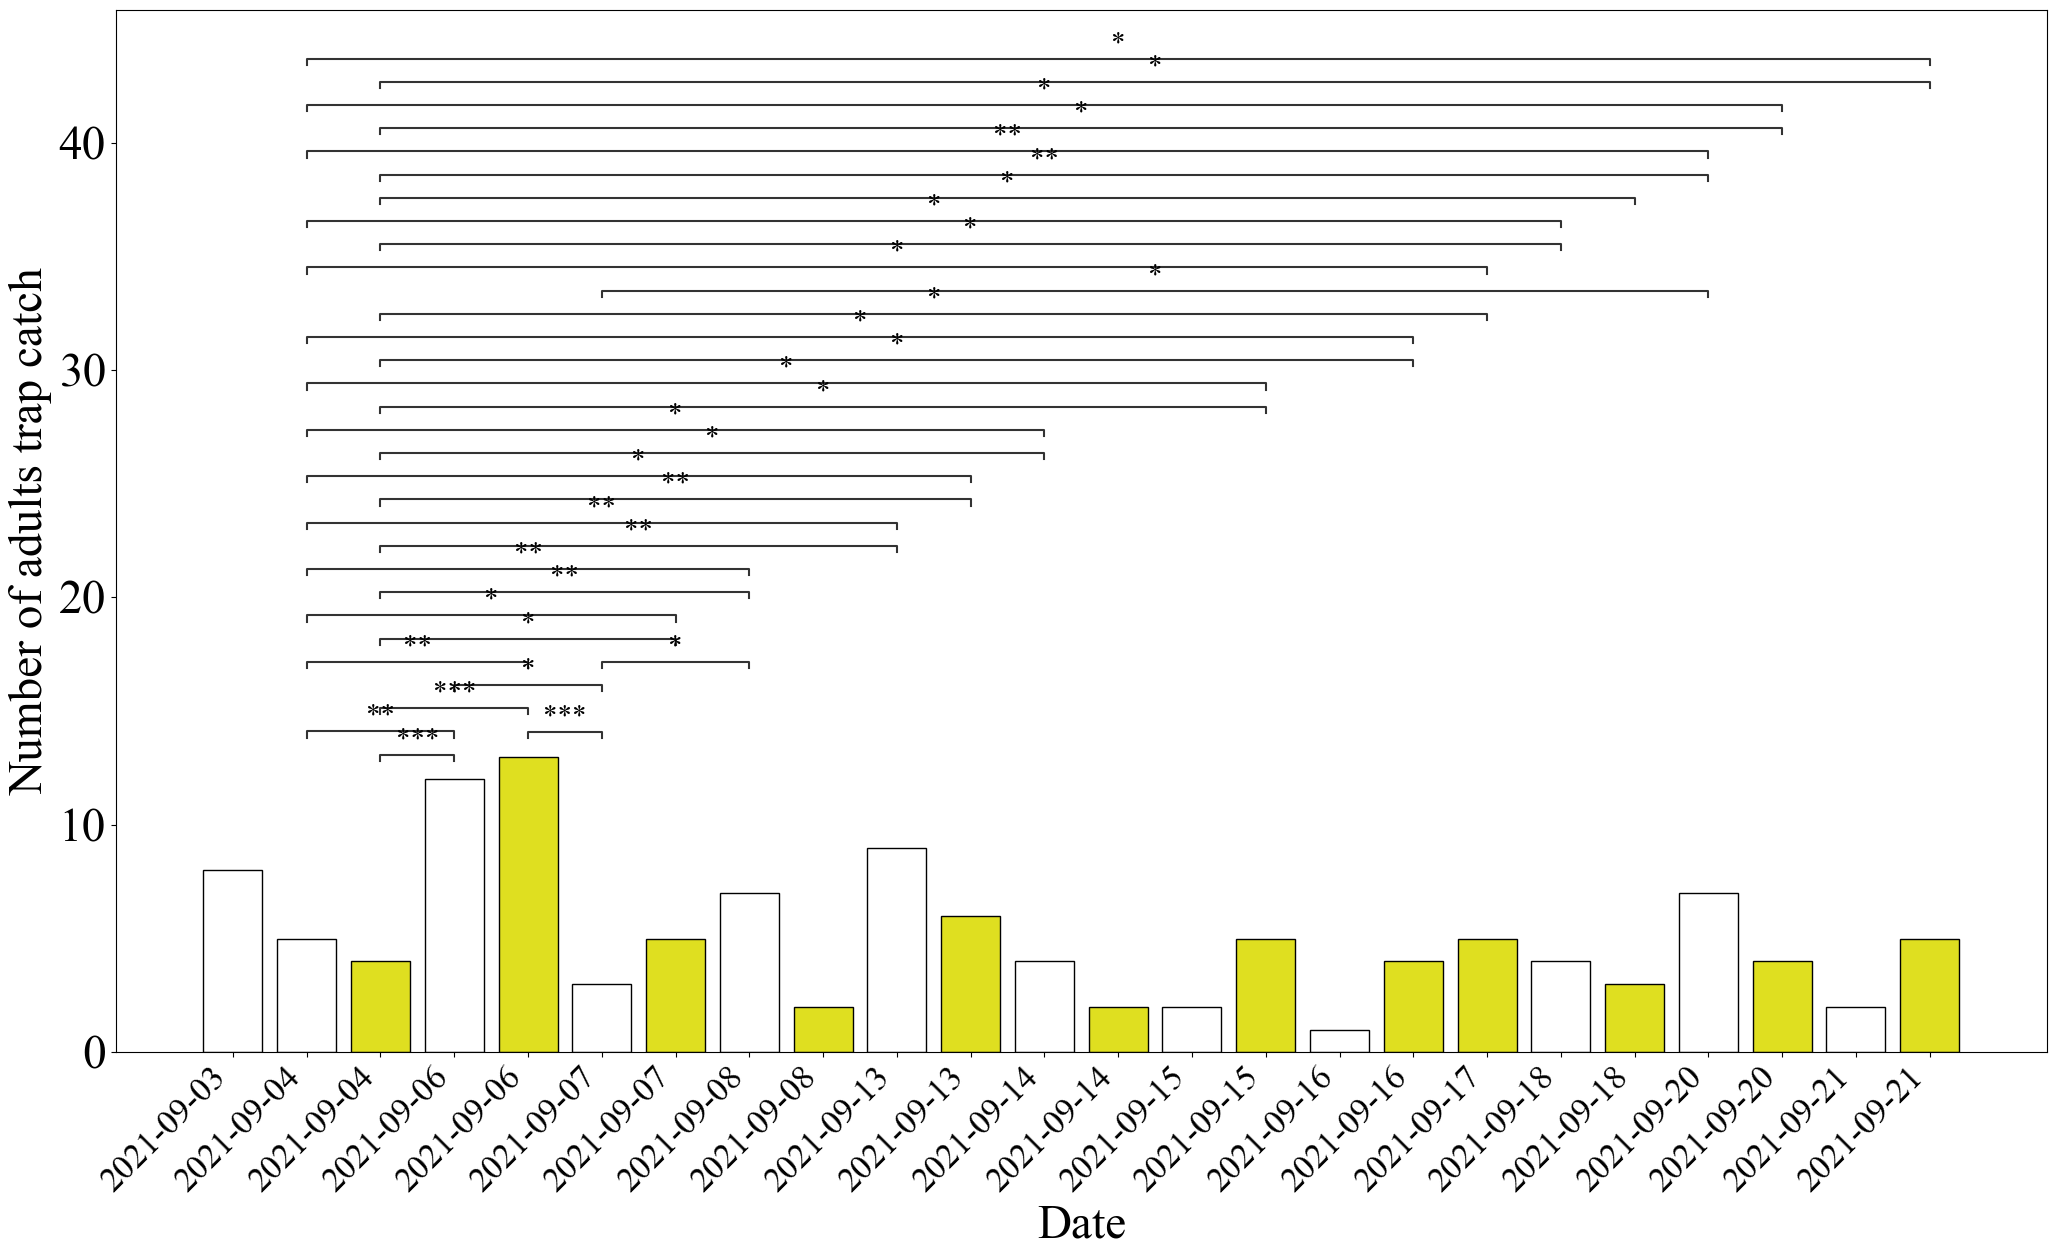

In [ ]:
plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 34,
    'axes.labelsize': 34,
    'xtick.labelsize': 17,
    'ytick.labelsize': 34,
    'legend.fontsize': 34,
    'figure.labelsize': 34
})

data = df_final.copy()
data['COLOR_FECHA'] = data['COLOR_FECHA'].astype(str)
data_sum = data.groupby('COLOR_FECHA', as_index=False)['ADULTOS'].sum()

order = ['White_2021-09-03',
         'White_2021-09-04', 'Yellow_2021-09-04',
         'White_2021-09-06', 'Yellow_2021-09-06',
         'White_2021-09-07', 'Yellow_2021-09-07',
         'White_2021-09-08', 'Yellow_2021-09-08',
         'White_2021-09-13', 'Yellow_2021-09-13',
         'White_2021-09-14', 'Yellow_2021-09-14',
         'White_2021-09-15', 'Yellow_2021-09-15',
         'White_2021-09-16', 'Yellow_2021-09-16',
                                'Yellow_2021-09-17',
         'White_2021-09-18', 'Yellow_2021-09-18',
         'White_2021-09-20', 'Yellow_2021-09-20',
         'White_2021-09-21', 'Yellow_2021-09-21']

order_labels = [label.split('_')[1] for label in order]
palette = {}
for label in order:
    if "White_" in label:
        palette[label] = "white"
    elif "Yellow_" in label:
        palette[label] = "yellow"
    else:
        palette[label] = "gray"

plt.figure(figsize=(21, 13))
ax = sns.barplot(
    data=data_sum,
    x='COLOR_FECHA',
    y='ADULTOS',
    ci=None,
    edgecolor='black',
    linewidth=1,
    order=order,
    palette=palette
)

ax.set_xticklabels(order_labels, rotation=45, ha='right', fontsize=25)

ax.set_xlabel('Date')
ax.set_ylabel('Number of adults trap catch')

pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i + 1, len(order))]

annotator = Annotator(
    ax,
    pairs,
    data=data,
    x='COLOR_FECHA',
    y='ADULTOS',
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    hide_non_significant=True
)

annotator.apply_test()
ax, test_results = annotator.annotate()

for line in ax.lines:
    if line.get_linewidth() > 0:
        line.set_visible(True)

plt.tight_layout()
plt.show()

# TRIAL 3

## Kruskal-Wallis Test

In [ ]:
DATA3_2 = pd.read_excel('/content/drive/MyDrive/BETA/PROYECTO PRODIPLOSIS/2. ARTICULO_TRAMPAS/Trials.xlsx', sheet_name='Trial_3')
DATA3_2.columns
id_vars = ['Fecha', 'Invernadero', 'Trampa', 'Altura (cm)']
value_vars = ['Amarillo', 'Blanco']

df_melted = pd.melt(
    DATA3_2,
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='COLOR',
    value_name='ADULTOS'
)

df_melted['ADULTOS'] = df_melted['ADULTOS'].fillna(0)

df_melted['Fecha_COLOR'] = df_melted['Fecha'].astype(str) + "_" + df_melted['COLOR'].astype(str)
df_melted['Fecha_Altura'] = df_melted['Fecha'].astype(str) + "_" + df_melted['Altura (cm)'].astype(str)
df_melted['COLOR_Altura'] = df_melted['COLOR'].astype(str) + "_" + df_melted['Altura (cm)'].astype(str)
df_melted['Fecha_COLOR_Altura'] = (
    df_melted['Fecha'].astype(str) + "_" +
    df_melted['COLOR'].astype(str) + "_" +
    df_melted['Altura (cm)'].astype(str)
)

fechas_grupos = [df_melted['ADULTOS'][df_melted['Fecha'] == f].values for f in df_melted['Fecha'].unique()]

kruskal_fecha = kruskal(*fechas_grupos)
print("Resultados de Kruskal-Wallis para las fechas:")
print(f"Estadístico: {kruskal_fecha.statistic:.4f}")
print(f"Valor p: {kruskal_fecha.pvalue:.1E}\n")

colores_grupos = [df_melted['ADULTOS'][df_melted['COLOR'] == c].values for c in df_melted['COLOR'].unique()]

kruskal_color = kruskal(*colores_grupos)
print("Resultados de Kruskal-Wallis para los colores:")
print(f"Estadístico: {kruskal_color.statistic:.4f}")
print(f"Valor p: {kruskal_color.pvalue:.4f}\n")

altura_grupos = [df_melted['ADULTOS'][df_melted['Altura (cm)'] == c].values for c in df_melted['Altura (cm)'].unique()]

kruskal_altura = kruskal(*altura_grupos)
print("Resultados de Kruskal-Wallis para altura:")
print(f"Estadístico: {kruskal_altura.statistic:.4f}")
print(f"Valor p: {kruskal_altura.pvalue:.4f}")

Resultados de Kruskal-Wallis para las fechas:
Estadístico: 50.0111
Valor p: 1.4E-08

Resultados de Kruskal-Wallis para los colores:
Estadístico: 0.0562
Valor p: 0.8125

Resultados de Kruskal-Wallis para altura:
Estadístico: 11.3830
Valor p: 0.0772


## Mann-Whitney Test

### Fig. 1D

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

30-49 vs. 50-69: Mann-Whitney-Wilcoxon test two-sided, P_val:7.277e-03 U_stat=1.256e+04
50-69 vs. 150-159: Mann-Whitney-Wilcoxon test two-sided, P_val:6.583e-03 U_stat=1.501e+04


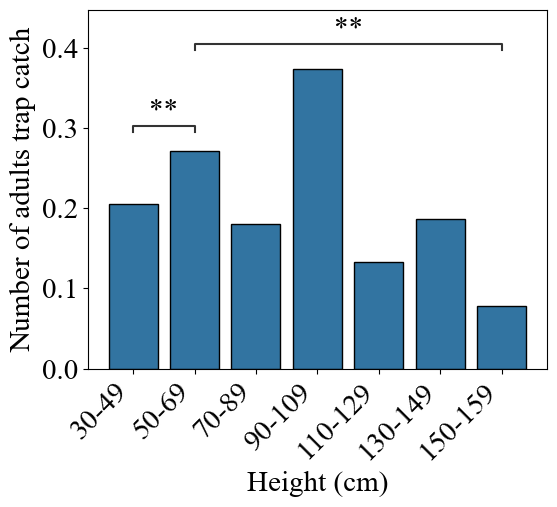

In [ ]:
data = df_melted.copy()
data['Fecha'] = data['Fecha'].astype(str)
pd.unique(data['Fecha'])

plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    #'axes.labelpad' : 18
    'figure.labelsize' : 21
})


data = df_melted.copy()
data['Altura (cm)'] = data['Altura (cm)'].astype(str)  # Asegurar string

# Agrupar sumando 'ADULTOS' por categoría
data_sum = data.groupby('Altura (cm)', as_index=False)['ADULTOS'].mean()

order = ['30-49', '50-69', '70-89', '90-109', '110-129', '130-149',
       '150-159']

plt.figure(figsize=(6, 5.5))

# Graficar barras con suma por categoría usando data_sum
ax = sns.barplot(
    data=data_sum,
    x='Altura (cm)',
    y='ADULTOS',
    ci=None,
    edgecolor='black',
    linewidth=1,
    order=order
)

ax.set_xlabel('Height (cm)')
ax.set_ylabel('Number of adults trap catch')

# Definir pares para prueba estadística sobre datos originales (individuos)
pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i + 1, len(order))]

# Crear Annotator para anotaciones con orden consistente y datos originales
annotator = Annotator(
    ax,
    pairs,
    data=data,
    x='Altura (cm)',
    y='ADULTOS',
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    hide_non_significant=True
)

annotator.apply_test()
ax, test_results = annotator.annotate()

for line in ax.lines:
    if line.get_linewidth() > 0:
        line.set_visible(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Fig. S3

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.0

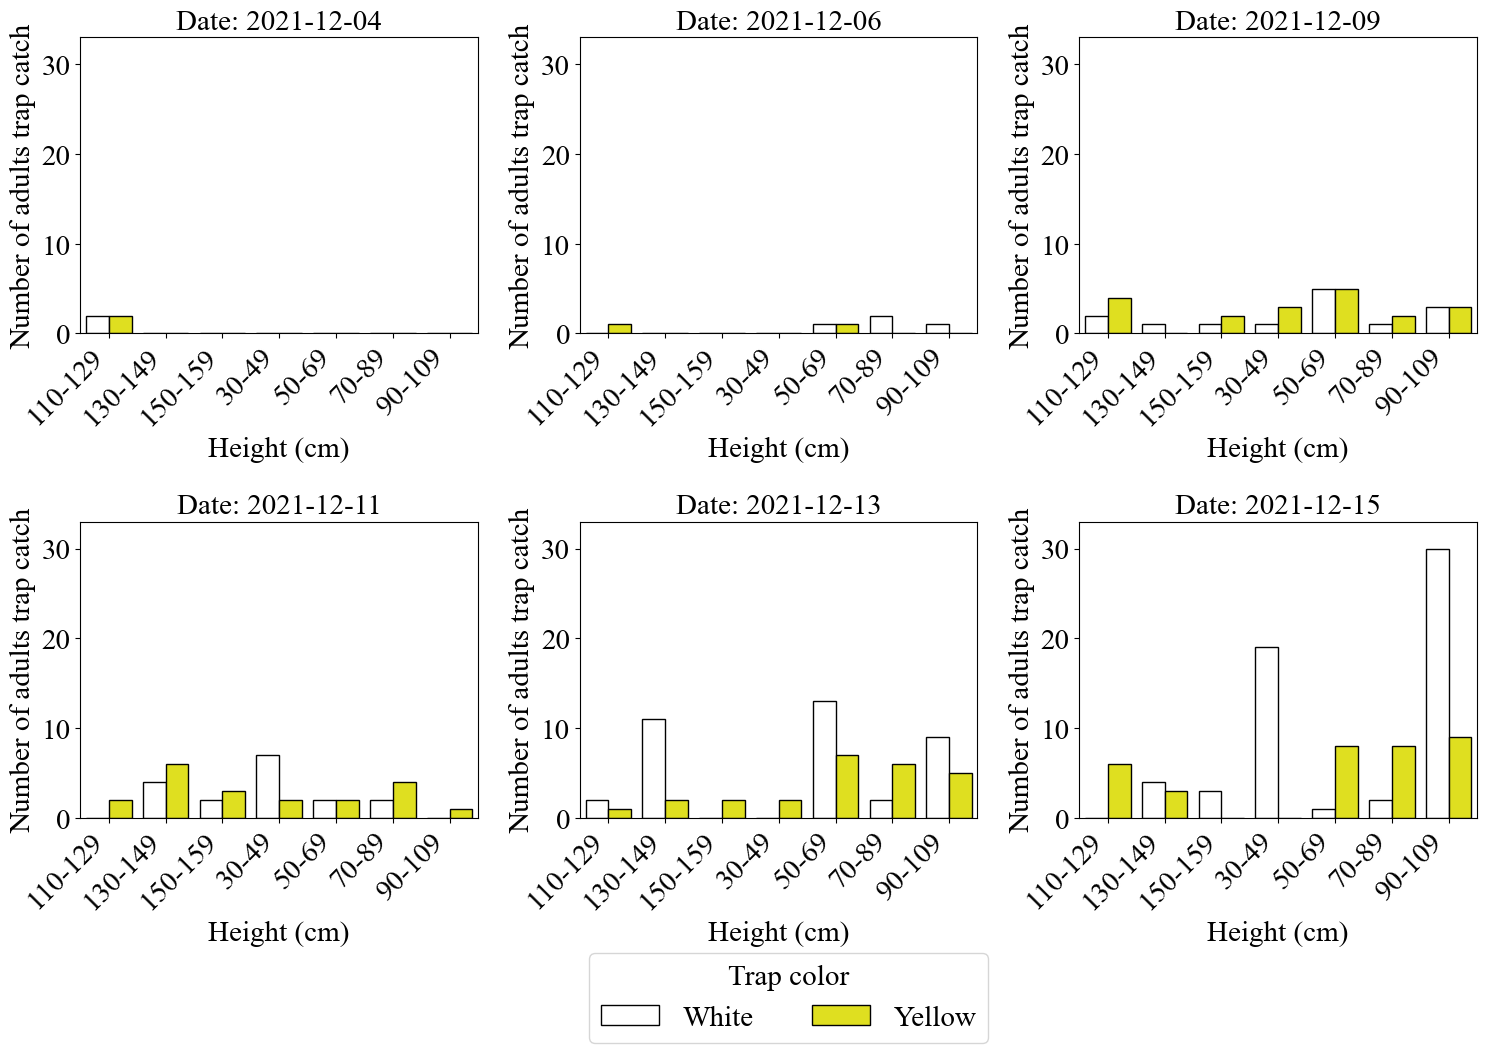

In [ ]:
fechas_a_eliminar = ['2021-12-02T00:00:00.000000000', '2021-12-03T00:00:00.000000000']
df_filtrado = df_melted[~df_melted['Fecha'].isin(fechas_a_eliminar)].copy()

df_filtrado['COLOR'] = df_filtrado['COLOR'].replace({'Amarillo': 'Yellow', 'Blanco': 'White'})

plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21
})

data_agg = df_filtrado.groupby(['Fecha', 'Altura (cm)', 'COLOR'])['ADULTOS'].sum().reset_index()
data_agg['Fecha'] = data_agg['Fecha'].astype(str)

palette_colores = {
    'Yellow': 'yellow',
    'White': 'white'
}

fechas = data_agg['Fecha'].unique()
n_fechas = len(fechas)

ncols = 3
nrows = (n_fechas + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 5 * nrows), squeeze=False)
axes_flat = axes.flatten()

y_min = 0
y_max = data_agg['ADULTOS'].max() * 1.1

x_labels = sorted(data_agg['Altura (cm)'].unique())

for i, fecha in enumerate(fechas):
    ax = axes_flat[i]
    data_fecha = data_agg[data_agg['Fecha'] == fecha]

    barplot = sns.barplot(
        data=data_fecha,
        x='Altura (cm)',
        y='ADULTOS',
        hue='COLOR',
        palette=palette_colores,
        edgecolor='black',
        linewidth=1,
        ax=ax
    )

    ax.set_ylim(y_min, y_max)

    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha='right')

    leg = ax.get_legend()
    if leg:
        leg.remove()

    ax.set_title(f'Date: {fecha}', fontsize=21)
    ax.set_xlabel('Height (cm)', fontsize=21)
    ax.set_ylabel('Number of adults trap catch', fontsize=21)

    colores_unicos = data_fecha['Altura (cm)'].unique()
    pairs = [(colores_unicos[i], colores_unicos[j]) for i in range(len(colores_unicos)) for j in range(i + 1, len(colores_unicos))]

    annotator = Annotator(ax, pairs, data=data_fecha, x='Altura (cm)', y='ADULTOS')
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', hide_non_significant=True)
    annotator.apply_test()
    annotator.annotate()

for j in range(i + 1, ncols * nrows):
    fig.delaxes(axes_flat[j])

handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Trap color', loc='lower center', ncol=len(labels), fontsize=21, bbox_to_anchor=(0.45, -0.08))

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


# TRIAL 4

## Kruskal-Wallis Test

In [ ]:
DATA4_1 = pd.read_excel('/content/drive/MyDrive/BETA/PROYECTO PRODIPLOSIS/2. ARTICULO_TRAMPAS/Trials.xlsx', sheet_name='Trial_4')
DATA4_1 = DATA4_1.rename(columns={'total': 'Yellow'})
df_nuevo = DATA4_1[['Fecha', 'Invernadero', 'Trampa', 'Altura (cm)', 'Yellow']].copy()
df_nuevo = df_nuevo.rename(columns={'Yellow': 'ADULTOS'})

df_final = df_nuevo.copy()
df_final['COLOR'] = 'Yellow'
df_final = df_final[['Fecha', 'Invernadero', 'Trampa', 'Altura (cm)', 'COLOR', 'ADULTOS']]


fechas_grupos = [df_final['ADULTOS'][df_final['Fecha'] == f].values for f in df_final['Fecha'].unique()]

kruskal_fecha = kruskal(*fechas_grupos)
print("Resultados de Kruskal-Wallis para las fechas:")
print(f"Estadístico: {kruskal_fecha.statistic:.4f}")
print(f"Valor p: {kruskal_fecha.pvalue:.4f}\n")
colores_grupos = [df_final['ADULTOS'][df_final['Altura (cm)'] == c].values for c in df_final['Altura (cm)'].unique()]

kruskal_color = kruskal(*colores_grupos)
print("Resultados de Kruskal-Wallis para Altura (cm):")
print(f"Estadístico: {kruskal_color.statistic:.4f}")
print(f"Valor p: {kruskal_color.pvalue:.4f}")

print("Resultados de Kruskal-Wallis para las fechas:")
print(f"Estadístico: {kruskal_fecha.statistic:.4f}")
print(f"Valor p: {kruskal_fecha.pvalue:.1E}\n")

print("Resultados de Kruskal-Wallis para Altura (cm):")
print(f"Estadístico: {kruskal_color.statistic:.4f}")
print(f"Valor p: {kruskal_color.pvalue:.1E}")

Resultados de Kruskal-Wallis para las fechas:
Estadístico: 29.9813
Valor p: 0.0028

Resultados de Kruskal-Wallis para Altura (cm):
Estadístico: 41.7995
Valor p: 0.0000
Resultados de Kruskal-Wallis para las fechas:
Estadístico: 29.9813
Valor p: 2.8E-03

Resultados de Kruskal-Wallis para Altura (cm):
Estadístico: 41.7995
Valor p: 2.0E-07


## Mann-Whitney Test

### Fig. 1E

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

50-69 vs. 60-80: Mann-Whitney-Wilcoxon test two-sided, P_val:5.223e-09 U_stat=9.150e+01
60-80 vs. 70-89: Mann-Whitney-Wilcoxon test two-sided, P_val:9.488e-09 U_stat=1.590e+03
60-80 vs. 90-109: Mann-Whitney-Wilcoxon test two-sided, P_val:2.059e-07 U_stat=1.568e+03
70-89 vs. 110-129: Mann-Whitney-Wilcoxon test two-sided, P_val:1.356e-02 U_stat=1.242e+04
60-80 vs. 110-129: Mann-Whitney-Wilcoxon test two-sided, P_val:4.126e-07 U_stat=1.572e+03
50-69 vs. 110-129: Mann-Whitney-Wilcoxon test two-sided, P_val:6.253e-03 U_stat=1.223e+04
60-80 vs. 130-149: Mann-Whitney-Wilcoxon test two-sided, P_val:1.890e-07 U_stat=1.554e+03
60-80 vs. 150-169: Mann-Whitney-Wilcoxon test two-sided, P_val:5.252e-07 U_stat=1.540e+03


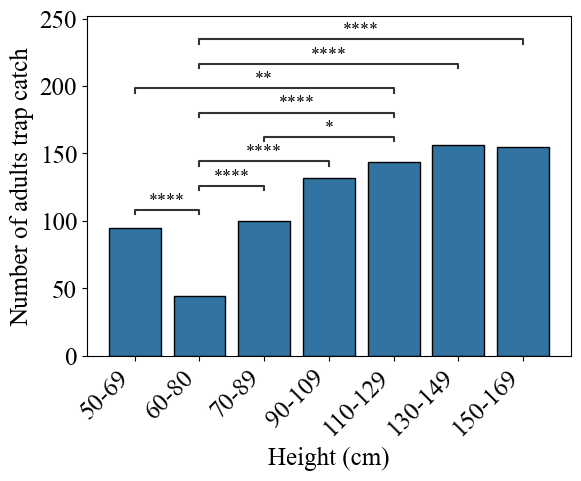

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

plt.rcParams.update({
    'font.size': 13,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18
})

data = df_final.copy()
data['Altura (cm)'] = data['Altura (cm)'].astype(str)
data_sum = data.groupby('Altura (cm)', as_index=False)['ADULTOS'].sum()

order = ['50-69', '60-80', '70-89', '90-109', '110-129', '130-149', '150-169']

plt.figure(figsize=(6, 5))

ax = sns.barplot(
    data=data_sum,
    x='Altura (cm)',
    y='ADULTOS',
    ci=None,
    edgecolor='black',
    linewidth=1,
    order=order
)

ax.set_xlabel('Height (cm)')
ax.set_ylabel('Number of adults trap catch')

pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i + 1, len(order))]

annotator = Annotator(
    ax,
    pairs,
    data=data,
    x='Altura (cm)',
    y='ADULTOS',
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    hide_non_significant=True
)

annotator.apply_test()
ax, test_results = annotator.annotate()

for line in ax.lines:
    if line.get_linewidth() > 0:
        line.set_visible(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# TRIAL 5

In [ ]:
data_colores = pd.read_excel('/content/drive/MyDrive/BETA/PROYECTO PRODIPLOSIS/2. ARTICULO_TRAMPAS/Trials.xlsx', sheet_name='Trial_5')
data_colores['Variedad'] = np.where(data_colores['LOTE'].str.startswith('R'),'Ruscus','Cocculus')
data_colores['COLOR'] = data_colores['COLOR'].replace({'VERDE':'Green', 'BLANCO':'White', 'ROJO':'Red', 'AZUL':'Blue', 'AMARILLO':'Yellow', 'NEGRO':'Black'})
data_colores['SEVERIDAD'] = data_colores['SEVERIDAD'].fillna('Fenología')
data_colores['SEVERIDAD'] = data_colores['SEVERIDAD'].replace({'ALTA':'High', 'MEDIA':'Medium', 'BAJA':'Low'})

### Table S1

Total catches of Prodiplosis longifilia individuals in six trap colors in seven plots coded as Cocculus (C) or Ruscus (R), and Santa Ana (SA), El Retiro (ER), and Campo Alegre (CA) farms with time series of four samples in trial 5. M is the sample mean, SD is the standard deviation.

In [ ]:
grouped_data = data_colores.groupby(['LOTE', 'COLOR'])['ADULTOS'].agg(['mean', 'std', 'min', 'max']).reset_index()
grouped_data.rename(columns={
    'mean': 'Mean',
    'std': 'SD',
    'min': 'Min',
    'max': 'Max'
}, inplace=True)

grouped_data['Mean'] = grouped_data['Mean'].round(1)
grouped_data['SD'] = grouped_data['SD'].round(1)
grouped_data['Min'] = grouped_data['Min'].round(1)
grouped_data['Max'] = grouped_data['Max'].round(1)

top_15_data = grouped_data.head(100)
top_15_data

,LOTE,COLOR,Mean,SD,Min,Max
0,C1- SANTA ANA,Black,0.8,2.0,0,5
1,C1- SANTA ANA,Blue,1.2,1.2,0,3
2,C1- SANTA ANA,Green,0.5,0.8,0,2
3,C1- SANTA ANA,Red,1.8,1.6,0,4
4,C1- SANTA ANA,White,2.5,2.3,0,5
5,C1- SANTA ANA,Yellow,2.8,2.3,0,6
6,C2- SANTA ANA,Black,1.3,0.6,1,2
7,C2- SANTA ANA,Blue,0.3,0.6,0,1
8,C2- SANTA ANA,Green,0.0,0.0,0,0
9,C2- SANTA ANA,Red,0.3,0.6,0,1


## Kruskal-Wallis Test

In [ ]:
from scipy.stats import kruskal
import pandas as pd

df_melted = data_colores.copy()

# --- Función para aplicar Kruskal-Wallis por grupo ---
def kruskal_por_grupo(df, col_grupo, variable='ADULTOS'):
    grupos = [df[variable][df[col_grupo] == g].values for g in df[col_grupo].unique()]
    resultado = kruskal(*grupos)
    print(f"Resultados de Kruskal-Wallis para {col_grupo}:")
    print(f"Estadístico: {resultado.statistic:.4f}")
    print(f"Valor p: {resultado.pvalue:.1E}\n")

kruskal_por_grupo(df_melted, 'FECHA')
kruskal_por_grupo(df_melted, 'LOTE')
kruskal_por_grupo(df_melted, 'TRAMPA')
kruskal_por_grupo(df_melted, 'SEVERIDAD')
kruskal_por_grupo(df_melted, 'COLOR')
kruskal_por_grupo(df_melted, 'Variedad')

Resultados de Kruskal-Wallis para FECHA:
Estadístico: 60.3702
Valor p: 7.8E-14

Resultados de Kruskal-Wallis para LOTE:
Estadístico: 33.2376
Valor p: 9.4E-06

Resultados de Kruskal-Wallis para TRAMPA:
Estadístico: 4.7638
Valor p: 9.2E-02

Resultados de Kruskal-Wallis para SEVERIDAD:
Estadístico: 13.3998
Valor p: 1.2E-03

Resultados de Kruskal-Wallis para COLOR:
Estadístico: 16.1142
Valor p: 6.5E-03

Resultados de Kruskal-Wallis para Variedad:
Estadístico: 0.2018
Valor p: 6.5E-01



## Mann-Whitney Test

### Fig. 6A

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Green vs. White: Mann-Whitney-Wilcoxon test two-sided, P_val:1.612e-02 U_stat=2.340e+02
Blue vs. Yellow: Mann-Whitney-Wilcoxon test two-sided, P_val:9.216e-03 U_stat=2.210e+02
Green vs. Red: Mann-Whitney-Wilcoxon test two-sided, P_val:4.252e-02 U_stat=2.555e+02
White vs. Blue: Mann-Whitney-Wilcoxon test two-sided, P_val:3.569e-02 U_stat=4.790e+02
Green vs. Yellow: Mann-Whitney-Wilcoxon test two-sided, P_val:2.223e-03 U_stat=1.970e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Blue vs. Yellow: Mann-Whitney-Wilcoxon test two-sided, P_val:3.788e-02 U_stat=2.505e+02


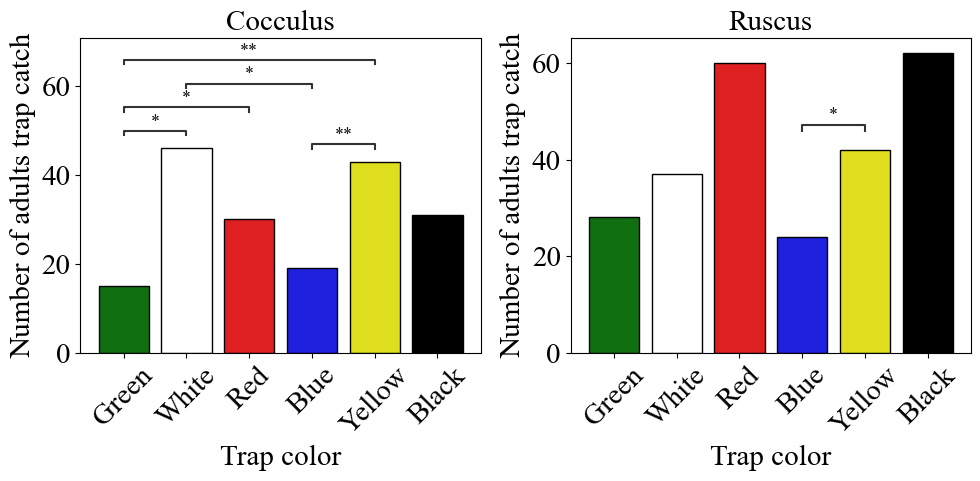

In [ ]:
plt.rcParams.update({
    'font.size': 13,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    'figure.labelsize': 21
})

data = data_colores.copy()
data['COLOR'] = data['COLOR'].astype(str)

order = ['Green', 'White', 'Red', 'Blue', 'Yellow', 'Black']

palette = {
    'Green': 'green',
    'White': 'white',
    'Red': 'red',
    'Blue': 'blue',
    'Yellow': 'yellow',
    'Black': 'black'
}

variedades_unicas = data['Variedad'].unique()
n = len(variedades_unicas)

cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5), squeeze=False)

for i, variedad in enumerate(variedades_unicas):
    ax = axes[i // cols, i % cols]
    data_var = data[data['Variedad'] == variedad]
    data_sum = data_var.groupby('COLOR', as_index=False)['ADULTOS'].sum()

    sns.barplot(
        data=data_sum,
        x='COLOR',
        y='ADULTOS',
        ci=None,
        edgecolor='black',
        linewidth=1,
        order=order,
        palette=palette,
        ax=ax
    )
    ax.set_xlabel('Trap color')
    ax.set_ylabel('Number of adults trap catch')
    ax.set_title(f'{variedad}')
    ax.tick_params(axis='x', rotation=45)

    pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i + 1, len(order))]

    annotator = Annotator(
        ax,
        pairs,
        data=data_var,
        x='COLOR',
        y='ADULTOS',
        order=order
    )

    annotator.configure(
        test='Mann-Whitney',
        text_format='star',
        loc='inside',
        hide_non_significant=True
    )

    annotator.apply_test()
    ax, _ = annotator.annotate()

    for line in ax.lines:
        if line.get_linewidth() > 0:
            line.set_visible(True)

for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

### Fig. 6B

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2024-10-04 vs. 2024-10-15: Mann-Whitney-Wilcoxon test two-sided, P_val:2.447e-02 U_stat=3.500e+00
2024-10-04 vs. 2024-10-30: Mann-Whitney-Wilcoxon test two-sided, P_val:4.922e-03 U_stat=0.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2024-10-04 vs. 2024-10-15: Mann-Whitney-Wilcoxon test two-sided, P_val:4.922e-03 U_stat=0.000e+00
2024-10-04 vs. 2024-10-30: Mann-Whitney-Wilcoxon test two-sided, P_val:7.687e-03 U_stat=1.000e+00


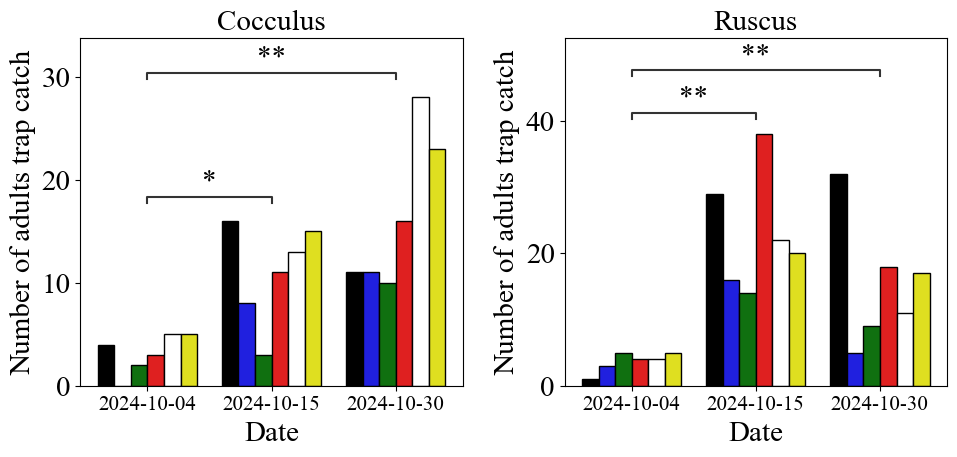

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 15,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    'figure.labelsize': 8
})

lotes = data_colores['Variedad'].unique()
n_lotes = len(lotes)

ncols = 2
nrows = (n_lotes + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5 * nrows), squeeze=False)
axes_flat = axes.flatten()

for idx, lote in enumerate(lotes):
    ax = axes_flat[idx]
    data = data_colores[data_colores['Variedad'] == lote]
    data = data.groupby(['FECHA', 'COLOR'])['ADULTOS'].sum().reset_index()
    data['FECHA'] = data['FECHA'].astype(str)


    barplot = sns.barplot(
        data=data,
        x='FECHA',
        y='ADULTOS',
        hue='COLOR',
        palette=['black', 'blue', 'green', 'red', 'white', 'yellow'],
        ax=ax
    )
    for patch in barplot.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

    if ax.get_legend() is not None:
        ax.get_legend().remove()

    ax.set_title(f'{lote}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of adults trap catch')
    ax.set_facecolor('white')

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.8)

    fechas = data['FECHA'].unique()
    pairs = [(fechas[i], fechas[j]) for i in range(len(fechas)) for j in range(i + 1, len(fechas))]

    annotator = Annotator(ax, pairs, data=data, x='FECHA', y='ADULTOS')
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', hide_non_significant=True)
    annotator.apply_test()
    annotator.annotate()

for j in range(n_lotes, len(axes_flat)):
    if j != 7:
        fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

### Fig. 6C

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High vs. Low: Mann-Whitney-Wilcoxon test two-sided, P_val:4.847e-03 U_stat=3.600e+01
Low vs. Medium: Mann-Whitney-Wilcoxon test two-sided, P_val:1.275e-02 U_stat=2.000e+00
High vs. Medium: Mann-Whitney-Wilcoxon test two-sided, P_val:3.671e-02 U_stat=3.150e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High vs. Low: Mann-Whitney-Wilcoxon test two-sided, P_val:4.922e-03 U_stat=3.600e+01
High vs. Medium: Mann-Whitney-Wilcoxon test two-sided, P_val:4.998e-03 U_stat=3.600e+01


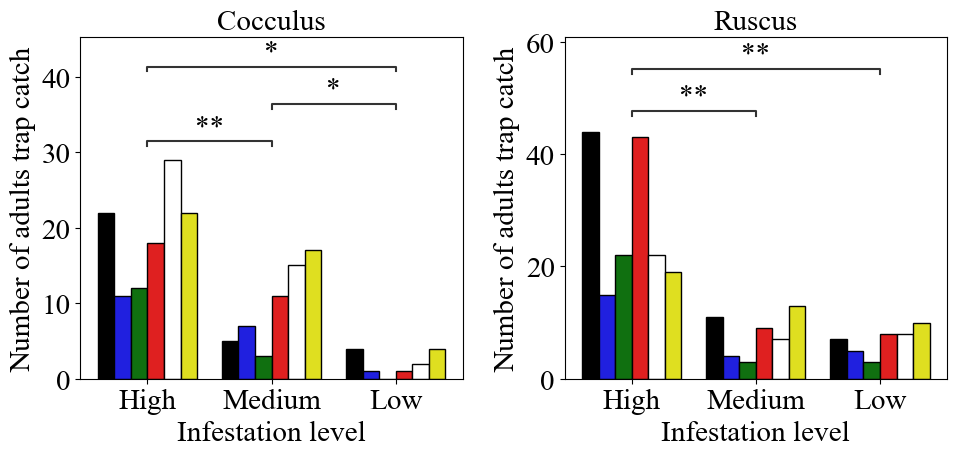

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    'figure.labelsize': 8
})

lotes = data_colores['Variedad'].unique()
n_lotes = len(lotes)

ncols = 2
nrows = (n_lotes + ncols - 1) // ncols
order = ['High', 'Medium', 'Low']

fig, axes = plt.subplots(nrows, ncols, figsize=(10, 5 * nrows), squeeze=False)
axes_flat = axes.flatten()

for idx, lote in enumerate(lotes):
    ax = axes_flat[idx]
    data = data_colores[data_colores['Variedad'] == lote]
    data = data.groupby(['SEVERIDAD', 'COLOR'])['ADULTOS'].sum().reset_index()
    data['SEVERIDAD'] = data['SEVERIDAD'].astype(str)


    barplot = sns.barplot(
        data=data,
        x='SEVERIDAD',
        y='ADULTOS',
        hue='COLOR',
        order = order,
        palette=['black', 'blue', 'green', 'red', 'white', 'yellow'],
        ax=ax
    )
    for patch in barplot.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

    if ax.get_legend() is not None:
        ax.get_legend().remove()

    ax.set_title(f'{lote}')
    ax.set_xlabel('Infestation level')
    ax.set_ylabel('Number of adults trap catch')
    ax.set_facecolor('white')

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.8)

    fechas = data['SEVERIDAD'].unique()
    pairs = [(fechas[i], fechas[j]) for i in range(len(fechas)) for j in range(i + 1, len(fechas))]

    annotator = Annotator(ax, pairs, data=data, x='SEVERIDAD', y='ADULTOS')
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', hide_non_significant=True)
    annotator.apply_test()
    annotator.annotate()

for j in range(n_lotes, len(axes_flat)):
    if j != 7:
        fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

### Fig. 7

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2024-10-04 vs. 2024-10-15: Mann-Whitney-Wilcoxon test two-sided, P_val:2.445e-02 U_stat=4.000e+00
2024-10-04 vs. 2024-10-30: Mann-Whitney-Wilcoxon test two-sided, P_val:2.445e-02 U_stat=4.000e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2024-10-04 vs. 2024-10-15: Mann-Whitney-Wilcoxon test two-sided, P_val:1.431e-02 U_stat=2.500e+00
2024-10-04 vs. 2024-10-30: Mann-Whitney-Wilcoxon test two-sided, P_val:1.448e-02 U_stat=2.500e+00
p-value annotation legend:
     

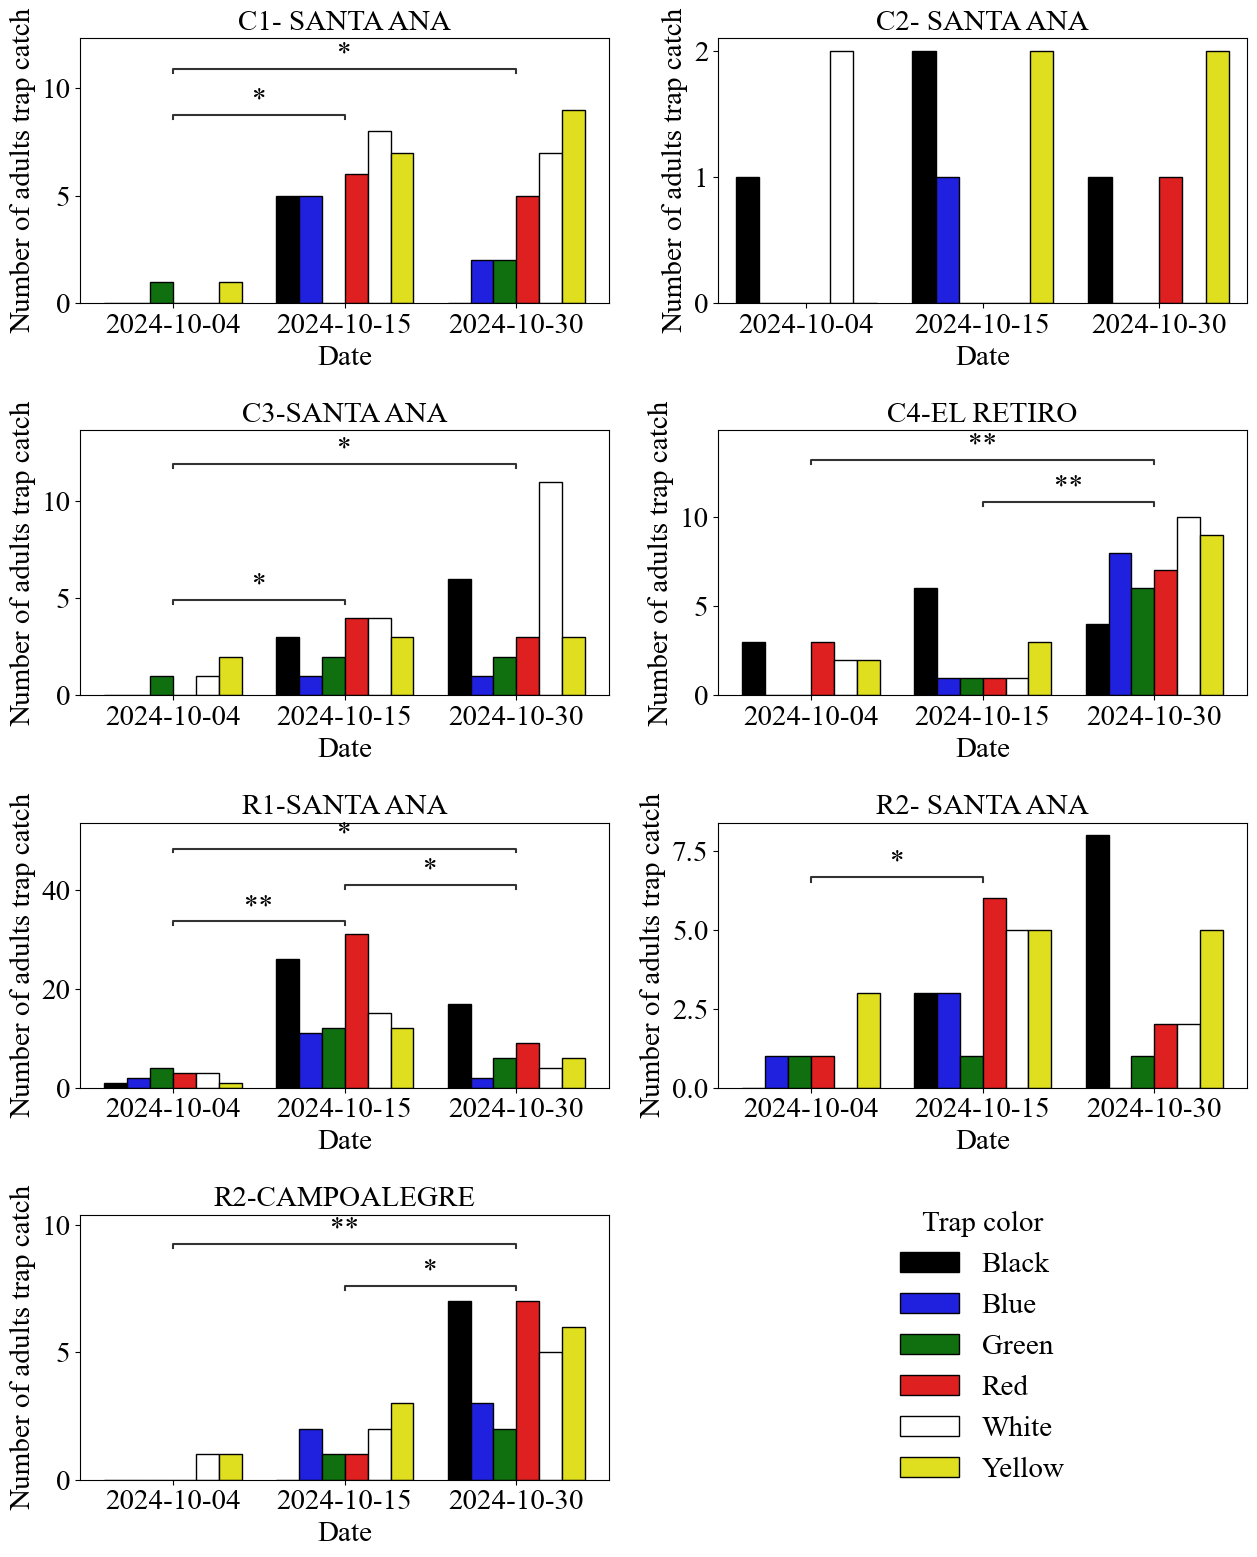

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    'figure.labelsize': 21
})

order = [ 'C1- SANTA ANA', 'C2- SANTA ANA', 'C3-SANTA ANA', 'C4-EL RETIRO',
         'R1-SANTA ANA', 'R2- SANTA ANA', 'R2-CAMPOALEGRE']
lotes = data_colores['LOTE'].unique()
n_lotes = len(lotes)

ncols = 2
nrows = (n_lotes + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(13, 4 * nrows), squeeze=False)
axes_flat = axes.flatten()

for idx, lote in enumerate(order):
    ax = axes_flat[idx]
    data = data_colores[data_colores['LOTE'] == lote]
    data = data.groupby(['FECHA', 'COLOR'])['ADULTOS'].sum().reset_index()
    data['FECHA'] = data['FECHA'].astype(str)

    barplot=sns.barplot(data=data,
                        x='FECHA', y='ADULTOS',
                        hue='COLOR',
                        palette=['black', 'blue', 'green', 'red', 'white', 'yellow'],
                        ax=ax)
    for patch in barplot.patches:
        patch.set_edgecolor('black')
        patch.set_linewidth(1)

    ax.set_title(f'{lote}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of adults trap catch')
    ax.set_facecolor('white')

    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.8)

    fechas = data['FECHA'].unique()
    pairs = [(fechas[i], fechas[j]) for i in range(len(fechas)) for j in range(i + 1, len(fechas))]

    annotator = Annotator(ax, pairs, data=data, x='FECHA', y='ADULTOS')
    annotator.configure(test='Mann-Whitney', text_format='star', loc='inside', hide_non_significant=True)
    annotator.apply_test()
    annotator.annotate()

if len(axes_flat) > 7:
    handles, labels = axes_flat[0].get_legend_handles_labels()
    for ax in axes_flat[:n_lotes]:
        if ax.get_legend() is not None:
            ax.get_legend().remove()

    fig.delaxes(axes_flat[7])

    legend_ax = fig.add_subplot(nrows, ncols, 8)
    legend_ax.axis('off')
    legend_ax.legend(handles, labels, loc='center', frameon=False, fontsize=21, title='Trap color')

for j in range(n_lotes, len(axes_flat)):
    if j != 7:
        fig.delaxes(axes_flat[j])

plt.tight_layout()
plt.show()

### Fig. S4A

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Green vs. White: Mann-Whitney-Wilcoxon test two-sided, P_val:2.744e-02 U_stat=1.120e+03
Red vs. Blue: Mann-Whitney-Wilcoxon test two-sided, P_val:3.514e-02 U_stat=1.780e+03
Blue vs. Yellow: Mann-Whitney-Wilcoxon test two-sided, P_val:8.913e-04 U_stat=9.440e+02
Green vs. Red: Mann-Whitney-Wilcoxon test two-sided, P_val:3.804e-02 U_stat=1.140e+03
White vs. Blue: Mann-Whitney-Wilcoxon test two-sided, P_val:2.486e-02 U_stat=1.802e+03
Green vs. Yellow: Mann-Whitney-Wilcoxon test two-sided, P_val:1.227e-03 U_stat=9.570e+02


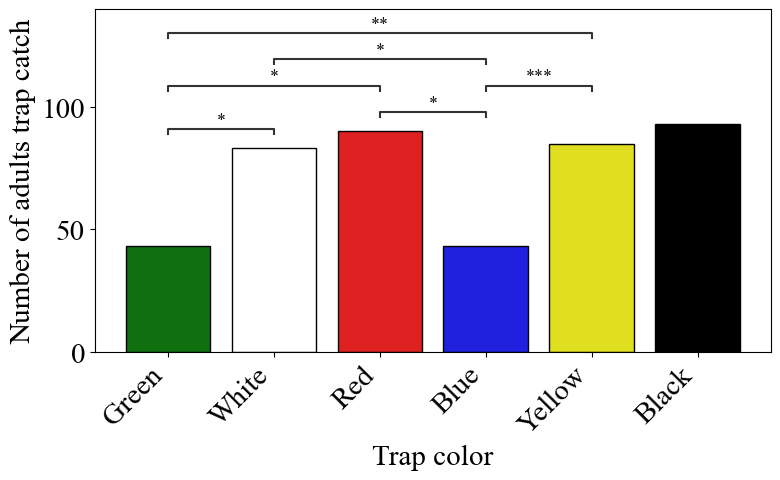

In [ ]:
data_colores['COLOR'] = data_colores['COLOR'].astype(str)
pd.unique(data_colores['COLOR'])

plt.rcParams.update({
    'font.size': 13,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    'figure.labelsize' : 21
})

data = data_colores.copy()
data['COLOR'] = data['COLOR'].astype(str)
data_sum = data.groupby('COLOR', as_index=False)['ADULTOS'].sum()

order = ['Green', 'White', 'Red', 'Blue', 'Yellow', 'Black']
palette = {
    'Green': 'green',
    'White': 'white',
    'Red': 'red',
    'Blue': 'blue',
    'Yellow': 'yellow',
    'Black': 'black'
}

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=data_sum,
    x='COLOR',
    y='ADULTOS',
    ci=None,
    edgecolor='black',
    linewidth=1,
    order=order,
    palette=palette
)

ax.set_xlabel('Trap color')
ax.set_ylabel('Number of adults trap catch')
pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i + 1, len(order))]

annotator = Annotator(
    ax,
    pairs,
    data=data,
    x='COLOR',
    y='ADULTOS',
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    hide_non_significant=True
)

annotator.apply_test()
ax, test_results = annotator.annotate()

for line in ax.lines:
    if line.get_linewidth() > 0:
        line.set_visible(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Fig. S4B

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

2024-10-04 vs. 2024-10-15: Mann-Whitney-Wilcoxon test two-sided, P_val:2.218e-10 U_stat=3.136e+03
2024-10-04 vs. 2024-10-30: Mann-Whitney-Wilcoxon test two-sided, P_val:3.617e-13 U_stat=2.709e+03


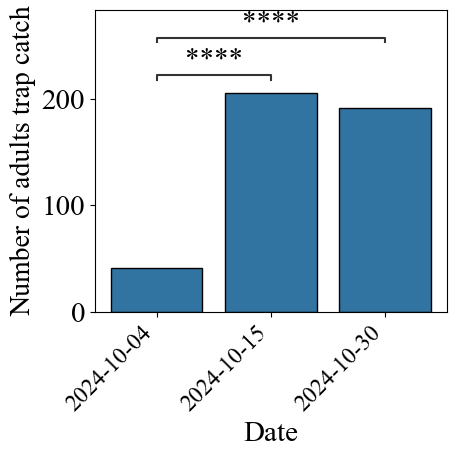

In [ ]:
data_colores['FECHA'] = data_colores['FECHA'].astype(str)
pd.unique(data_colores['FECHA'])

plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 17,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    'figure.labelsize' : 21
})

data = data_colores.copy()
data['FECHA'] = data['FECHA'].astype(str)
data_sum = data.groupby('FECHA', as_index=False)['ADULTOS'].sum()

order = ['2024-10-04', '2024-10-15', '2024-10-30']

plt.figure(figsize=(5, 5))

ax = sns.barplot(
    data=data_sum,
    x='FECHA',
    y='ADULTOS',
    ci=None,
    edgecolor='black',
    linewidth=1,
    order=order
)

ax.set_xlabel('Date')
ax.set_ylabel('Number of adults trap catch', size = 20)

# Definir pares para prueba estadística sobre datos originales (individuos)
pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i + 1, len(order))]

# Crear Annotator para anotaciones con orden consistente y datos originales
annotator = Annotator(
    ax,
    pairs,
    data=data,
    x='FECHA',
    y='ADULTOS',
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    hide_non_significant=True
)

annotator.apply_test()
ax, test_results = annotator.annotate()

for line in ax.lines:
    if line.get_linewidth() > 0:
        line.set_visible(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Fig. S4C

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

High vs. Medium: Mann-Whitney-Wilcoxon test two-sided, P_val:4.691e-02 U_stat=8.344e+03
High vs. Low: Mann-Whitney-Wilcoxon test two-sided, P_val:3.597e-04 U_stat=7.454e+03


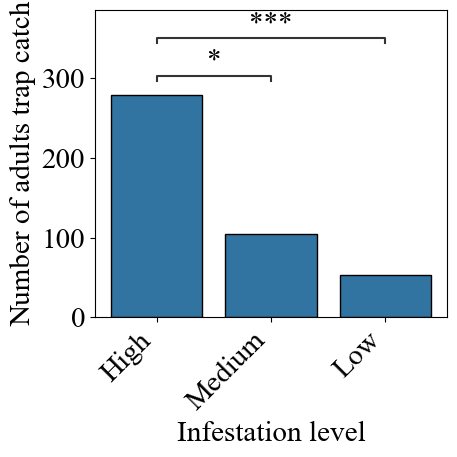

In [ ]:
data_colores['SEVERIDAD'] = data_colores['SEVERIDAD'].astype(str)
pd.unique(data_colores['SEVERIDAD'])
plt.rcParams.update({
    'font.size': 21,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    'figure.labelsize' : 21
})

data1 = data_colores.copy()
filtro = (data1['SEVERIDAD'].isin(['High', 'Medium', 'Low']))
data = data1.loc[filtro]
data['SEVERIDAD'] = data['SEVERIDAD'].astype(str)
data_sum = data.groupby('SEVERIDAD', as_index=False)['ADULTOS'].sum()

order = ['High', 'Medium', 'Low']

plt.figure(figsize=(5, 5))

ax = sns.barplot(
    data=data_sum,
    x='SEVERIDAD',
    y='ADULTOS',
    ci=None,
    edgecolor='black',
    linewidth=1,
    order=order
)

ax.set_xlabel('Infestation level')
ax.set_ylabel('Number of adults trap catch')
pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i + 1, len(order))]
annotator = Annotator(
    ax,
    pairs,
    data=data,
    x='SEVERIDAD',
    y='ADULTOS',
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    hide_non_significant=True
)

annotator.apply_test()
ax, test_results = annotator.annotate()

for line in ax.lines:
    if line.get_linewidth() > 0:
        line.set_visible(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Fig. S4D

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

R1-SA vs. R2-SA: Mann-Whitney-Wilcoxon test two-sided, P_val:2.449e-05 U_stat=2.121e+03
R2-CA vs. C1-SA: Mann-Whitney-Wilcoxon test two-sided, P_val:4.552e-02 U_stat=7.470e+02
R1-SA vs. R2-CA: Mann-Whitney-Wilcoxon test two-sided, P_val:4.333e-06 U_stat=2.178e+03
R1-SA vs. C1-SA: Mann-Whitney-Wilcoxon test two-sided, P_val:4.319e-02 U_stat=1.213e+03
R1-SA vs. C2-SA: Mann-Whitney-Wilcoxon test two-sided, P_val:1.172e-03 U_stat=7.300e+02
R2-CA vs. C4-ER: Mann-Whitney-Wilcoxon test two-sided, P_val:2.233e-02 U_stat=1.108e+03
R1-SA vs. C3-SA: Mann-Whitney-Wilcoxon test two-sided, P_val:2.728e-05 U_stat=2.110e+03
R1-SA vs. C4-ER: Mann-Whitney-Wilcoxon test two-sided, P_val:5.519e-03 U_stat=1.898e+03


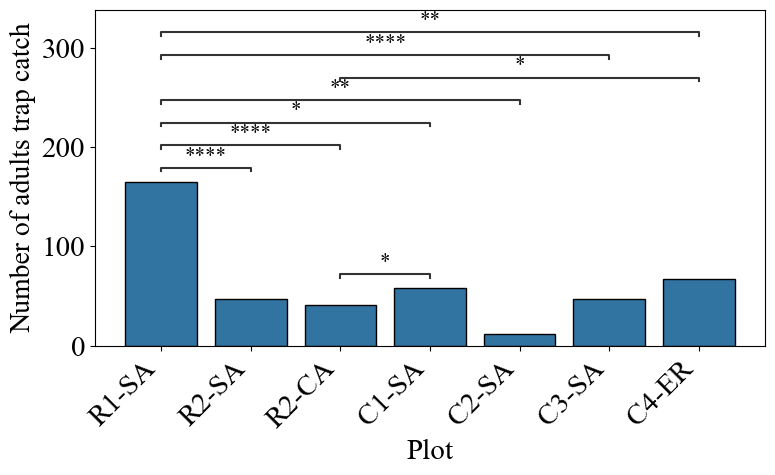

In [ ]:
data_colores['LOTE'] = data_colores['LOTE'].astype(str)
pd.unique(data_colores['LOTE'])

plt.rcParams.update({
    'font.size': 15,
    'axes.titlesize': 21,
    'axes.labelsize': 21,
    'xtick.labelsize': 21,
    'ytick.labelsize': 21,
    'legend.fontsize': 21,
    'figure.labelsize' : 21
})

data = data_colores.copy()
data['LOTE'] = data['LOTE'].replace({'R1-SANTA ANA':'R1-SA', 'R2- SANTA ANA':'R2-SA', 'R2-CAMPOALEGRE':'R2-CA',
                                     'C1- SANTA ANA':'C1-SA', 'C2- SANTA ANA':'C2-SA', 'C3-SANTA ANA':'C3-SA', 'C4-EL RETIRO': 'C4-ER'})
data['LOTE'] = data['LOTE'].astype(str)
data_sum = data.groupby('LOTE', as_index=False)['ADULTOS'].sum()

order = ['R1-SA', 'R2-SA', 'R2-CA',
         'C1-SA','C2-SA', 'C3-SA', 'C4-ER']

plt.figure(figsize=(8, 5))

ax = sns.barplot(
    data=data_sum,
    x='LOTE',
    y='ADULTOS',
    ci=None,
    edgecolor='black',
    linewidth=1,
    order=order
)

ax.set_xlabel('Plot')
ax.set_ylabel('Number of adults trap catch', size = 20)
pairs = [(order[i], order[j]) for i in range(len(order)) for j in range(i + 1, len(order))]

annotator = Annotator(
    ax,
    pairs,
    data=data,
    x='LOTE',
    y='ADULTOS',
    order=order
)

annotator.configure(
    test='Mann-Whitney',
    text_format='star',
    loc='inside',
    hide_non_significant=True
)

annotator.apply_test()
ax, test_results = annotator.annotate()

for line in ax.lines:
    if line.get_linewidth() > 0:
        line.set_visible(True)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()